Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [6]:
link = 'amz_uk_price_prediction_dataset.csv'

df = pd.read_csv(link)

Part 1: Analyzing Best-Seller Trends Across Product Categories

1.1 Crosstab Analysis 

In [8]:
# Generating a crosstab for 'category' and 'isBestSeller'
crosstab_category = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_category

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


The category that has the most prevalence of bestsellers is Women, followed (at a distance) by Women's Sports and Outdoor Shoes. 

In [12]:
# Calculate the proportion of best-sellers for each category
crosstab_category['proportion_best_seller'] = crosstab_category[True] / (crosstab_category[True] + crosstab_category[False])

# Sort the categories based on the proportion of best-sellers in descending order
sorted_crosstab = crosstab_category.sort_values(by='proportion_best_seller', ascending=False)
print(sorted_crosstab)

isBestSeller                      False  True  proportion_best_seller
category                                                             
Grocery                            9008   556                0.058135
Smart Home Security & Lighting       98     6                0.057692
Health & Personal Care             9017   552                0.057686
Mobile Phone Accessories            248    11                0.042471
Power & Hand Tools                 8353   306                0.035339
...                                 ...   ...                     ...
CD, Disc & Tape Players            8798     0                0.000000
General Music-Making Accessories    259     0                0.000000
Snowboard Boots                    1449     0                0.000000
Boxes & Organisers                  911     0                0.000000
eBook Readers & Accessories         246     0                0.000000

[296 rows x 3 columns]


1.2 Statistical Tests


In [14]:
from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestseller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_category)

chi2_statistic, chi2_p_value

(36684.23786636857, 0.0)

In [16]:
# Compute Cramér's V for the strength of association between best-seller status and category
n = crosstab_category.values.sum()
cramers_v = np.sqrt(chi2_statistic / (n * (min(crosstab_category.shape) - 1)))
print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.08663731815334759


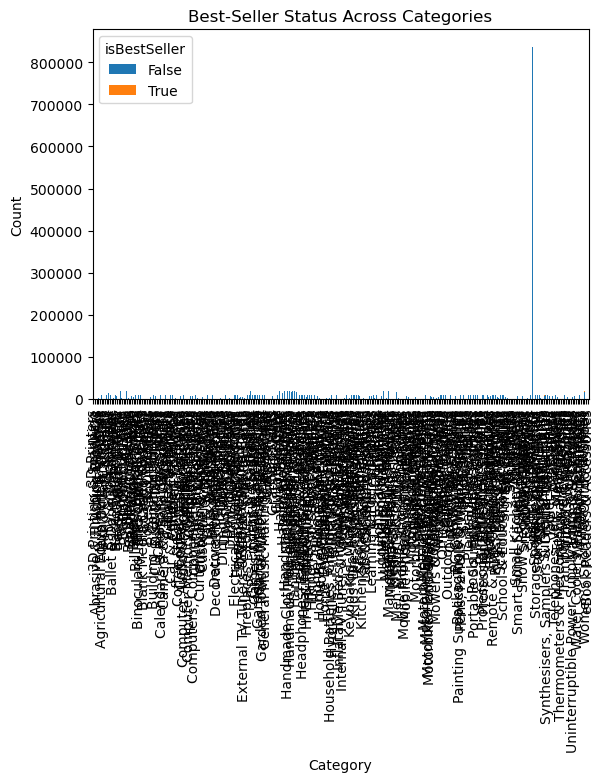

In [17]:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart
crosstab_category.iloc[:, :2].plot(kind='bar', stacked=True)
plt.title('Best-Seller Status Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


Part 2: Exploring Product Prices and Ratings Across Categories and Brands 

In [11]:
#summary statistics to find IQR 

summary_statistics = df.describe()

rounded_sum_stats = summary_statistics.round(2)
print(rounded_sum_stats)

              uid       stars     reviews       price  boughtInLastMonth
count  2443651.00  2443651.00  2443651.00  2443651.00         2443651.00
mean   1370545.35        2.15      480.63       89.24              25.90
std     816056.17        2.19     5944.12      345.61             240.48
min          1.00        0.00        0.00        0.00               0.00
25%     658921.50        0.00        0.00        9.99               0.00
50%    1349029.00        0.00        0.00       19.09               0.00
75%    2060685.50        4.40       59.00       45.99               0.00
max    2828593.00        5.00  1356658.00   100000.00           50000.00


In [18]:
# Removing outliers in prices using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]

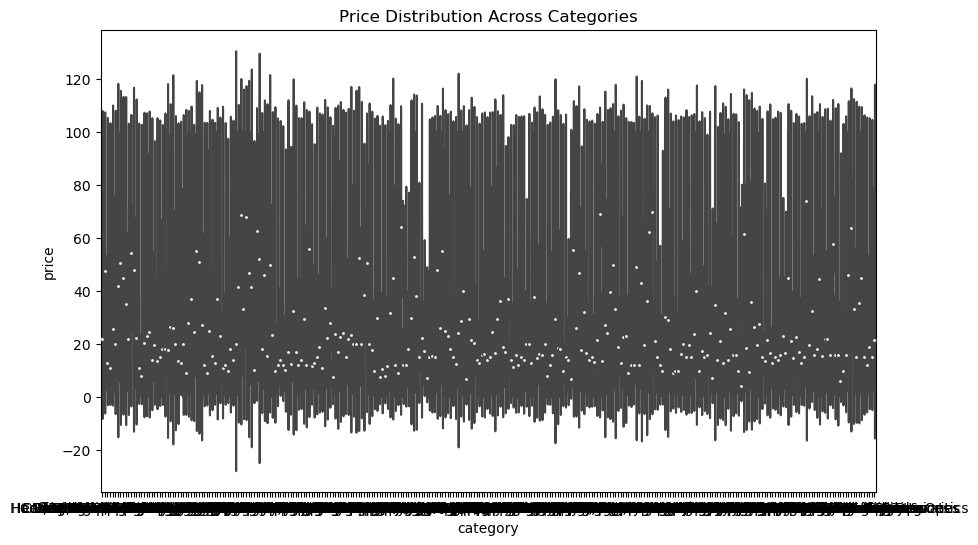

In [19]:
# Use a violin plot for the distribution of price across different product categories
plt.figure(figsize=(10, 6))
sns.violinplot(x='category', y='price', data=df_filtered)
plt.title('Price Distribution Across Categories')
plt.show()


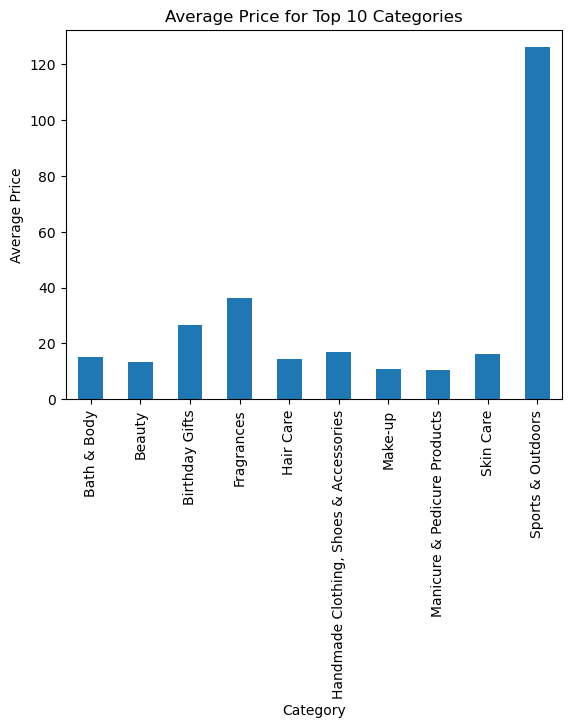

In [20]:
# Bar chart comparing the ave price for the top 10 product categories
top_categories = df['category'].value_counts().head(10).index
avg_price = df[df['category'].isin(top_categories)].groupby('category')['price'].mean()

avg_price.plot(kind='bar')
plt.title('Average Price for Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()

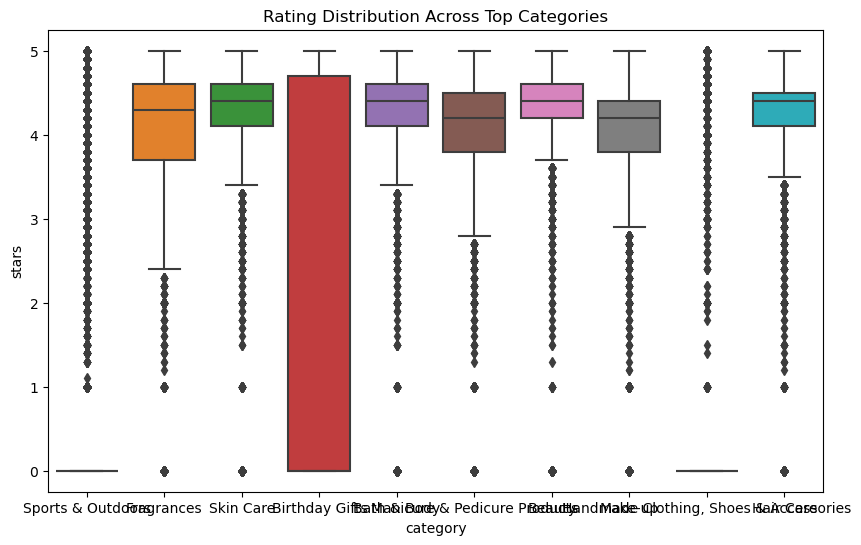

In [21]:
# Visualize the distribution of product ratings based on their category using side-by-side box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='stars', data=df_filtered[df_filtered['category'].isin(top_categories)])
plt.title('Rating Distribution Across Top Categories')
plt.show()

Part 3: Investigating the Interplay Between Product Prices and Ratings

In [22]:
# Calculate the correlation coefficient between price and stars
correlation = df_filtered['price'].corr(df_filtered['stars'])
print(f"Correlation between price and stars: {correlation}")

Correlation between price and stars: -0.07767299878181323


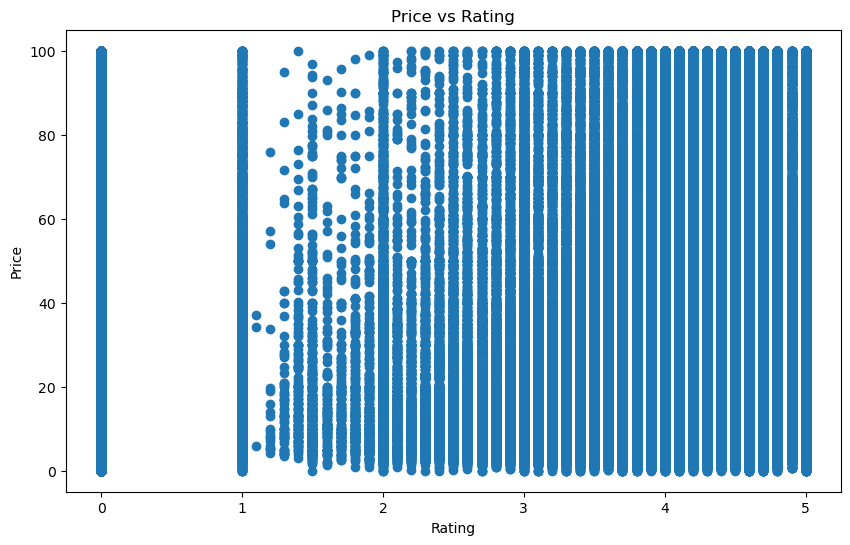

In [23]:
# Use a scatter plot to visualize the relationship between product rating and price
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['stars'], df_filtered['price'])
plt.title('Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

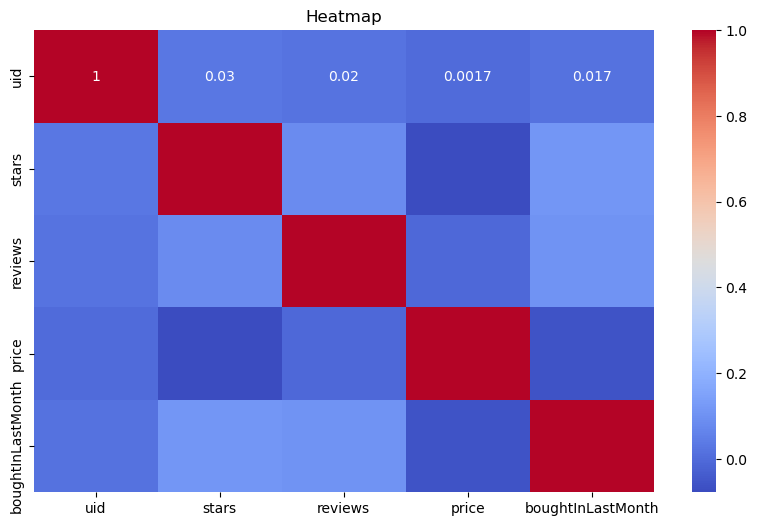

In [25]:
# Numeric columns for correlation analysis
numeric_cols = df_filtered.select_dtypes(include=[np.number])

# Use a correlation heatmap for correlations between all numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

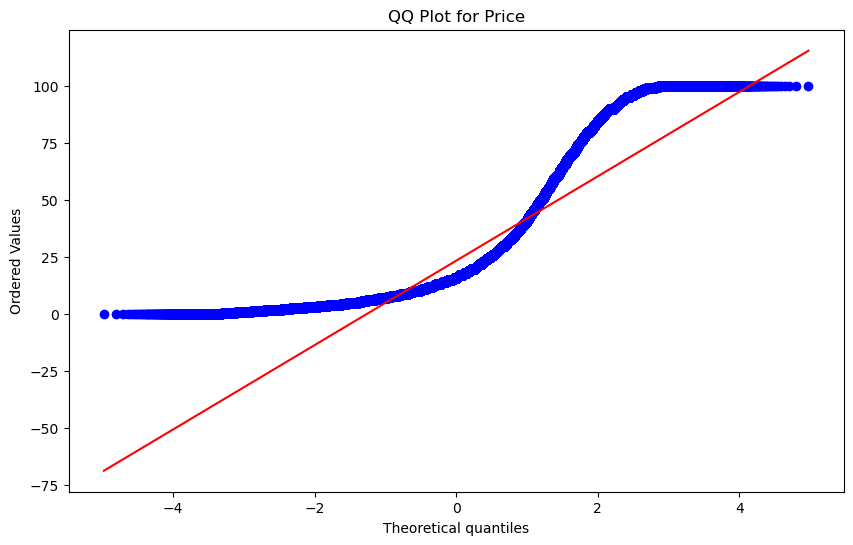

In [26]:
# QQ plot
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(df_filtered['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Price')
plt.show()